🎯 1. Introduction:

Dans le cadre de ce projet, nous explorons l’utilisation du Deep Learning pour l’analyse de sentiments à partir de critiques de films. Plus précisément, nous utilisons un réseau de neurones de type LSTM (Long Short-Term Memory), particulièrement adapté au traitement du langage naturel. Le modèle est entraîné sur le jeu de données IMDb, une référence dans le domaine, afin de prédire automatiquement si une critique est positive ou négative. Ce projet illustre concrètement comment les réseaux neuronaux peuvent être appliqués à des tâches d’analyse textuelle.


🛠️ 2. Installation de l’environnement

📂 3. Chargement des données

In [6]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

🧹 4.Prétraitement des données – Padding

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding sur les données d'entraînement
x_train_padded = pad_sequences(x_train, maxlen=200)

# Padding sur les données de test (à ajouter)
x_test_padded = pad_sequences(x_test, maxlen=200)

🧠 5.Création du modèle LSTM

Nous allons créer un modèle simple en utilisant l'API Sequential de Keras.

🔤 Embedding : transforme chaque mot (représenté par un entier) en un vecteur dense de taille 64.
🔁 LSTM : capture les relations et la logique entre les mots dans la séquence.
🎯 Dense : une couche de sortie avec une activation sigmoïde pour produire une probabilité (entre 0 et 1).
Ce modèle est adapté à une tâche de classification binaire : critique positive ou négative.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Définition du modèle
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),  # input_length retiré
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Affichage du résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

📈 6. Entraînement et visualisation

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 161ms/step - accuracy: 0.6717 - loss: 0.5825 - val_accuracy: 0.8602 - val_loss: 0.3275
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.9026 - loss: 0.2516 - val_accuracy: 0.8626 - val_loss: 0.3321
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.9319 - loss: 0.1849 - val_accuracy: 0.8675 - val_loss: 0.3256
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9480 - loss: 0.1445 - val_accuracy: 0.8645 - val_loss: 0.4170
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.9597 - loss: 0.1113 - val_accuracy: 0.8601 - val_loss: 0.3755


Text(0.5, 1.0, 'Accuracy')

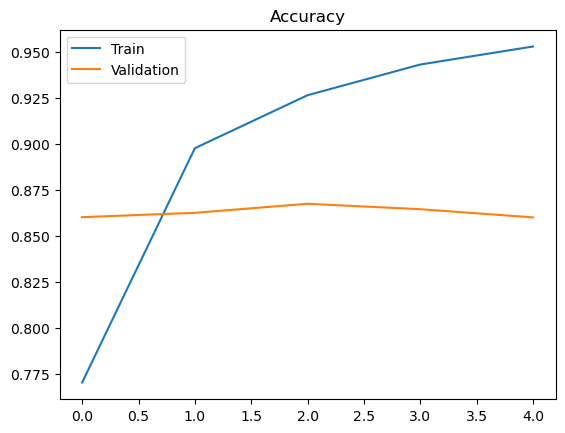

In [7]:
history = model.fit(x_train_padded, y_train, epochs=5, batch_size=64, validation_data=(x_test_padded, y_test))
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(); plt.title("Accuracy")


🤖 7. Prédire sur de nouveaux textes

# Qu’est-ce qu’un token ?

Un token est une unité de texte.
Dans notre cas (analyse de sentiment), chaque mot d'une critique devient un token, généralement représenté par un entir.

par Exemple :Phrase :"This movie was great"
Tokenisation (par mot) :on obtien un vecteur ["this", "movie", "was", "great"]
Avec word_index (IMDB),encode ce vecteur en tokens on obtient des valeurs numériques

In [9]:
def encode_review(text):
    word_index = imdb.get_word_index()
    word_index = {k:(v+3) for k,v in word_index.items()}
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNK>"] = 2
    tokens = text.lower().split()
    return [1] + [word_index.get(w, 2) for w in tokens]

review = "This movie was amazing and emotional"
encoded = pad_sequences([encode_review(review)], maxlen=200)
prediction = model.predict(encoded)
print(prediction)
print(f"Probabilité d’avis positif : {prediction[0][0]:.4f}")
print("Prédiction :", "Positif 😊" if prediction[0][0] > 0.5 else "Négatif 😠")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
[[0.6969149]]
Probabilité d’avis positif : 0.6969
Prédiction : Positif 😊


✅ 8. Conclusion

Ce projet permis de comprendre concrètement comment utiliser les RNN (Réseaux de neurones récurrents) pour la classification de texte.
On a vu comment charger des données, et préparer, créer un modèle LSTM , l'entraîner et faire des prédictions. 
Le tout fonctionne très bien avec ~85 % de précisio

Merci d’avoir regardé cette vidéo ! 🎥😊n.